In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Environment setup

### Library preparation

In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

In [3]:
import sys 
sys.path.append('..\..\_jjtools')

# from Exps import *

from JJ_data_processing import read_opj_data, pbi, bpbi, show_df, update_df
from JJ_data_processing import xy_by_id,extract_Isw_R0_by_id


from JJformulas import *
from meas_util import *

from JJmeasurement import *

C:\Users\KelvinOX25\Anaconda3\lib\site-packages\qcodes\dataset\database.py:13: UserWarning: The module `qcodes.dataset.database` is deprecated.
Public features are available at the import of `qcodes`.
Private features are available in `qcodes.dataset.sqlite.*` modules.
  warnings.warn('The module `qcodes.dataset.database` is deprecated.\n'
C:\Users\KelvinOX25\Anaconda3\lib\site-packages\tqdm\autonotebook.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


# Sample discription

In [4]:
jj = JJmeas(sample = 'D070B1N1v1')

jj.db_connect()

**Pin assignment 1ab 2ab**

**$E_{J0} = 350 mK$**

# Meas

## IVC overview

<IPython.core.display.Javascript object>


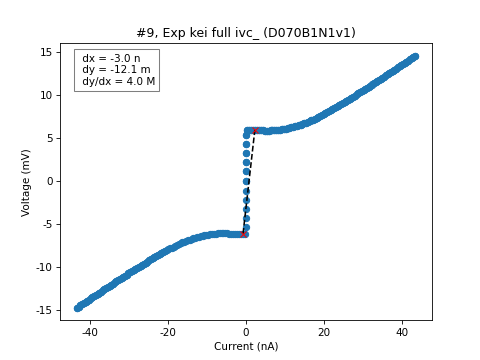

In [18]:
jj.pbi(9, interactive = True)

Rtot = 303k

Vg = 12.1m, N = 15

In [22]:
12.1 / 2/ 400

0.015125

In [126]:
7/(303/15)

0.34653465346534656

## Fine scan IVc

<IPython.core.display.Javascript object>


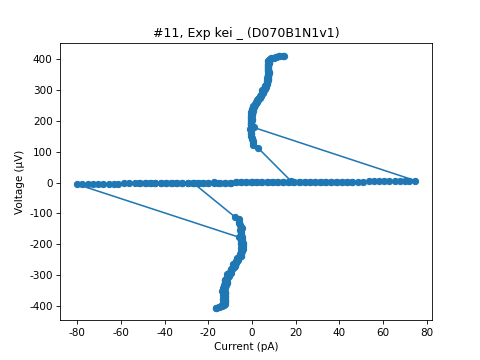

In [78]:
jj.pbi(11, ls = '-')

<IPython.core.display.Javascript object>


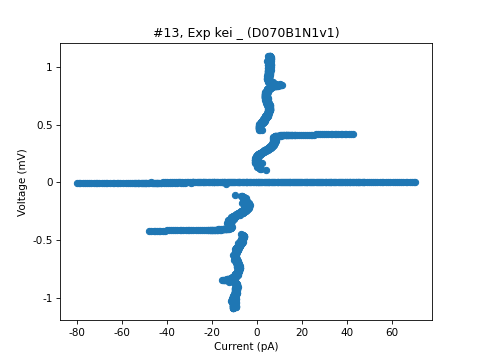

In [32]:
jj.pbi(13)

## B scan


..\..\_jjtools\JJ_data_processing.py:285: RuntimeWarning: invalid value encountered in less
  ind1 = np.where(np.abs(vA0) < dx )


<IPython.core.display.Javascript object>


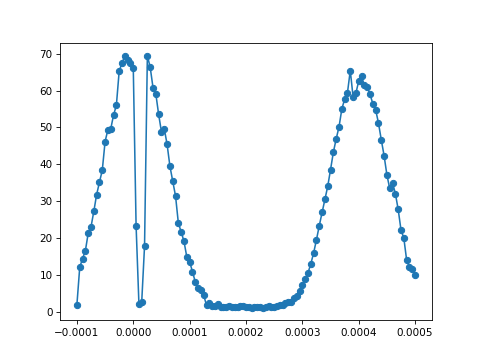

In [60]:
jj.ZF = -2e-6
jj.FF = 200e-6

B_list = np.linspace(-.10e-3, .5e-3, 121)
cos_list = abs (jj.B_to_cos(B_list))

ids = range(14, 134+1)

Ics = [2e12*extract_Isw_R0_by_id (idx, dy = 30e-6)[0] for idx in ids]


fig, ax = plt.subplots()
# ax.plot(cos_list, Ics, 'o-')
ax.plot(B_list, Ics, 'o-')

# ax.set_xscale('log')
# ax.set_xlim(0.1, 1)
# ax.set_yscale('log')

B = 150

<IPython.core.display.Javascript object>


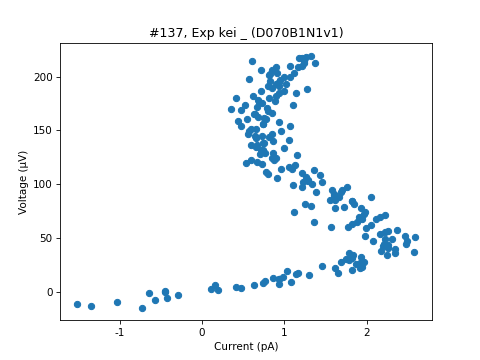

In [63]:
jj.pbi(137)

B = 155

<IPython.core.display.Javascript object>


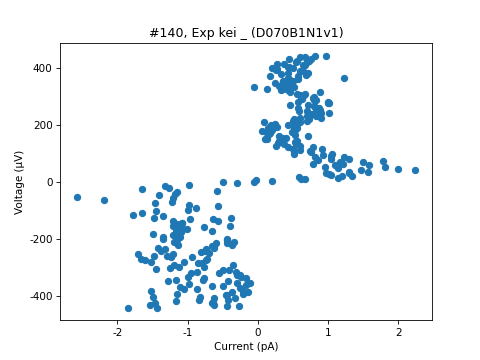

In [69]:
jj.pbi(140)

B = 165

<IPython.core.display.Javascript object>


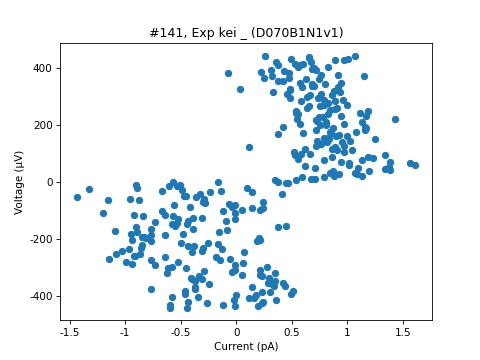

In [76]:
jj.pbi(141)

<IPython.core.display.Javascript object>


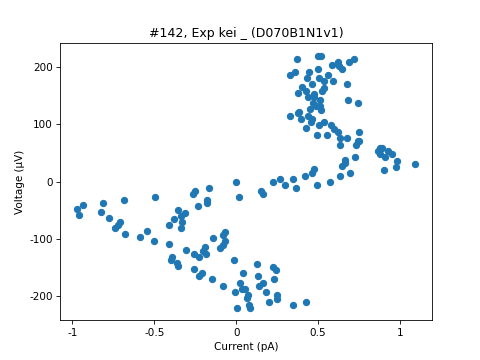

In [80]:
jj.pbi(142)

In [74]:
7/(238/14)

0.4117647058823529

In [75]:
7/(303/15)

0.34653465346534656

## Bscan again

..\..\_jjtools\JJ_data_processing.py:285: RuntimeWarning: invalid value encountered in less
  ind1 = np.where(np.abs(vA0) < dx )


<IPython.core.display.Javascript object>


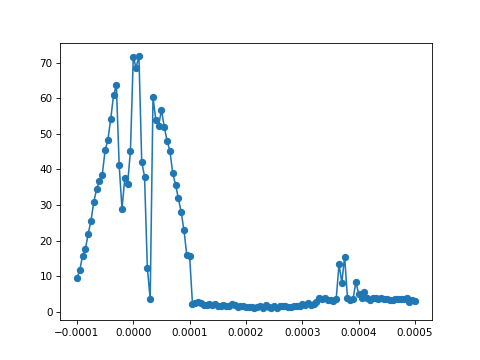

In [88]:
jj.ZF = -2e-6
jj.FF = 200e-6

B_list = np.linspace(-.10e-3, .5e-3, 121)
cos_list = abs (jj.B_to_cos(B_list))

ids = range(143, 263+1)

Ics = [2e12*extract_Isw_R0_by_id (idx, dy = 50e-6)[0] for idx in ids]


fig, ax = plt.subplots()
# ax.plot(cos_list, Ics, 'o-')
ax.plot(B_list, Ics, 'o-')

# ax.set_xscale('log')
# ax.set_xlim(0.1, 1)
# ax.set_yscale('log')

<IPython.core.display.Javascript object>


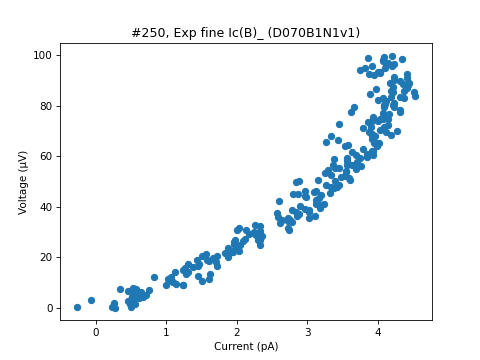

In [91]:
jj.pbi(250)

B = 0, 440, 220

<IPython.core.display.Javascript object>


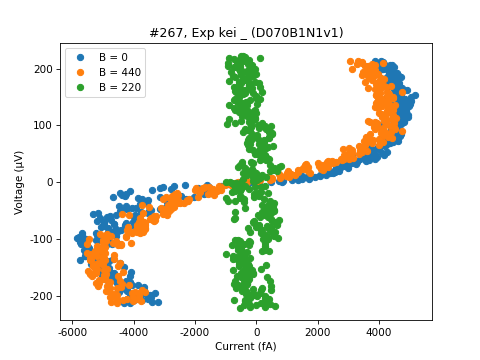

In [104]:
jj.bpbi([265, 266, 267],
       labels = ['B = 0', 'B = 440', 'B = 220'])

Why Isw is suppressed now?

try just open\close

<IPython.core.display.Javascript object>


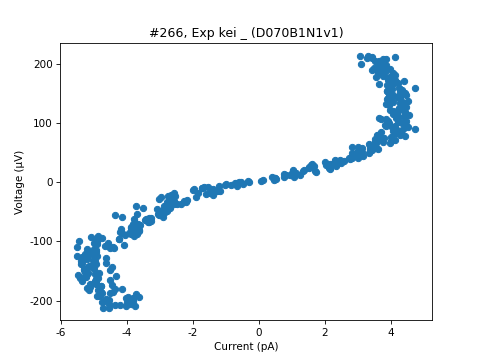

In [101]:
jj.pbi(266)

B = 220

In [ ]:
jj.pbi()

<IPython.core.display.Javascript object>


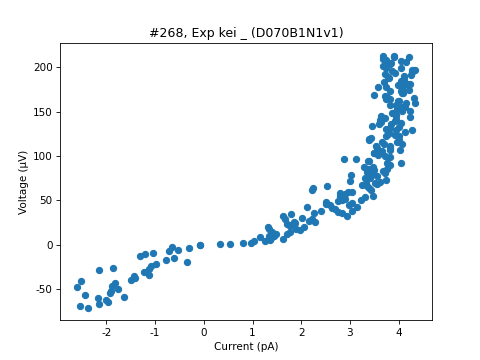

In [109]:
jj.pbi(268)

nope

try kei flo 

<IPython.core.display.Javascript object>


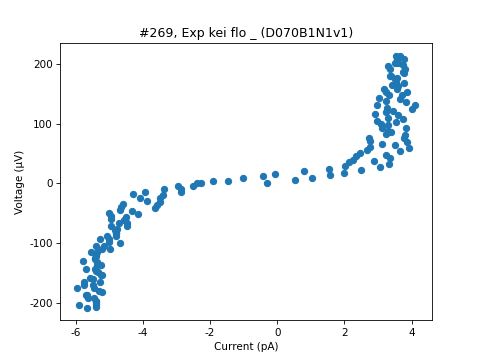

In [112]:
jj.pbi(269)

nope

try kei gnd 

<IPython.core.display.Javascript object>


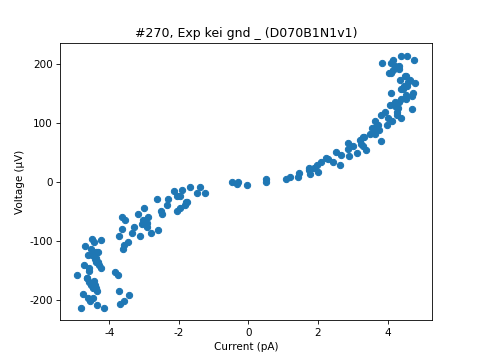

In [116]:
jj.pbi(270)

take a look on the large scale

<IPython.core.display.Javascript object>


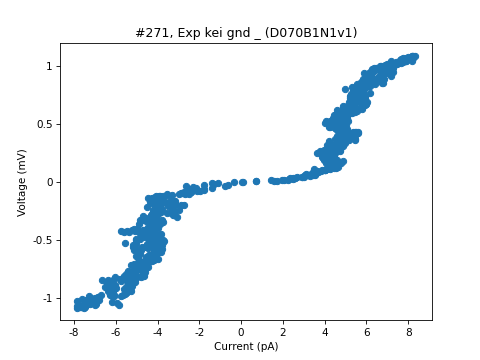

In [120]:
jj.pbi(271)

switch back to site N5 and compare

In [119]:
jjN5 = JJmeas(sample = 'D070B1N5v1')

jjN5.db_connect()

<IPython.core.display.Javascript object>


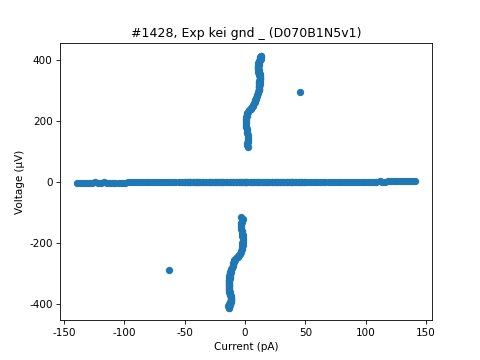

In [125]:
jjN5.pbi(1428)

yep, Isw = 140, supressed in comparison with 2005 is it related??






## Revisit after some time
I spent sime time on other sites, revisit it again

<IPython.core.display.Javascript object>


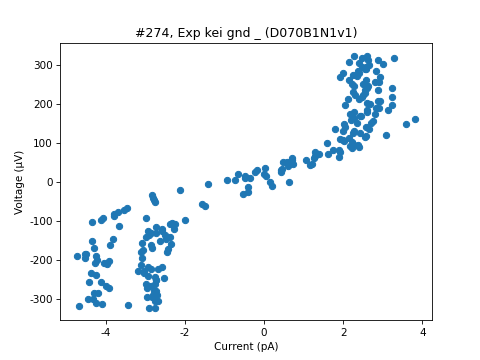

In [134]:
jj.pbi(274)

in the same time, site 5 got recovered, immediately remeas N1 again

<IPython.core.display.Javascript object>


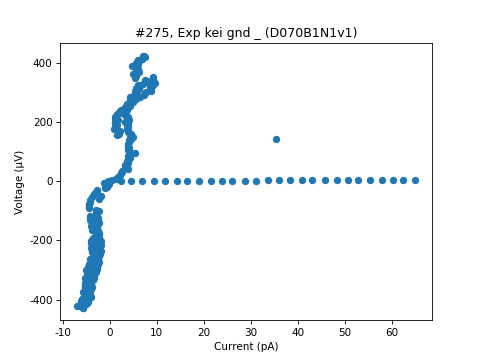

In [140]:
jj.pbi(275)

works!!! why?? stepsize is different, true

nonono, worked only for right part, left one is stil suppressed, agghh wtf

check N5, fine more or less, check again

<IPython.core.display.Javascript object>


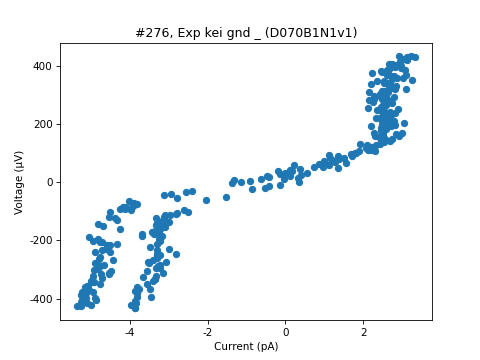

In [145]:
jj.pbi(276)

C:\Users\KelvinOX25\Anaconda3\lib\site-packages\qcodes\dataset\plotting.py:196: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, **subplots_kwargs)


<IPython.core.display.Javascript object>


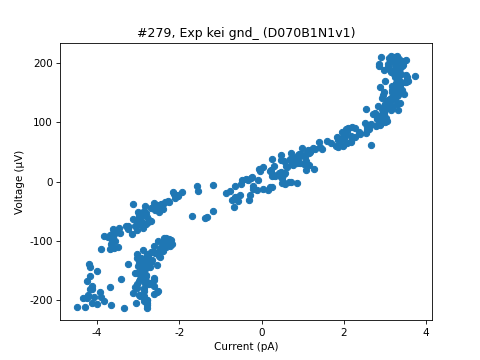

In [152]:
jj.pbi(279)

## many ivc B=0

..\..\_jjtools\JJ_data_processing.py:165: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


<IPython.core.display.Javascript object>


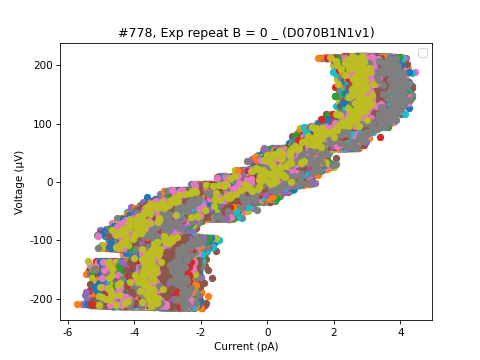

No handles with labels found to put in legend.


In [176]:
jj.bpbi(range(280, 779))

## attemt to recover Isw

so, 18x3.5 = 63 h meas showed that Isw doesn't recover by itself



C:\Users\KelvinOX25\Anaconda3\lib\site-packages\qcodes\dataset\plotting.py:196: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, **subplots_kwargs)


<IPython.core.display.Javascript object>


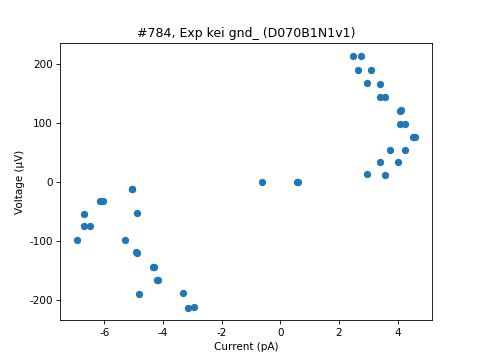

In [179]:
jj.pbi(784)

try to play with connections and so on to recover it

..\..\_jjtools\JJ_data_processing.py:165: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


<IPython.core.display.Javascript object>


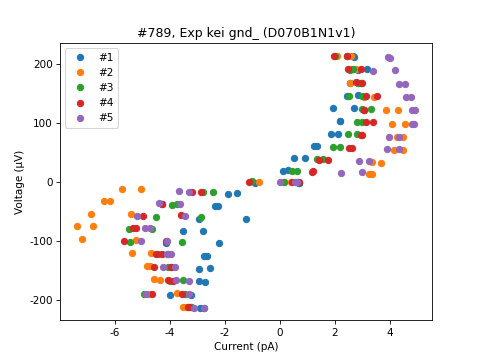

In [191]:
jj.bpbi([783,785, 786, 787, 789],
       labels = ['#1', '#2', '#3', '#4', '#5'])

but R0 changed... why? after reconnection to the instruments or before??

C:\Users\KelvinOX25\Anaconda3\lib\site-packages\qcodes\dataset\plotting.py:196: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, **subplots_kwargs)


<IPython.core.display.Javascript object>


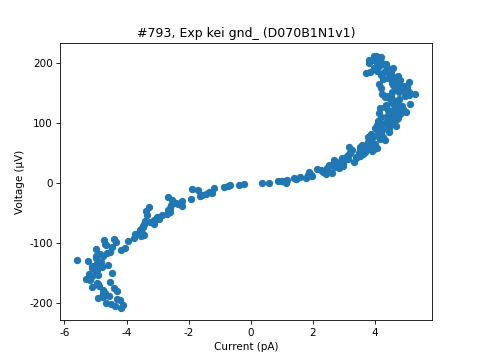

In [195]:
jj.pbi(793
      )

C:\Users\KelvinOX25\Anaconda3\lib\site-packages\qcodes\dataset\plotting.py:196: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, **subplots_kwargs)


<IPython.core.display.Javascript object>


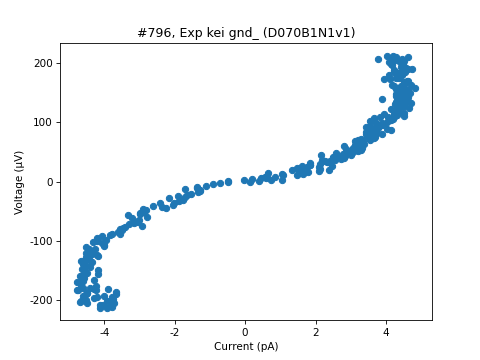

In [199]:
jj.pbi(796
      )

try full scan

C:\Users\KelvinOX25\Anaconda3\lib\site-packages\qcodes\dataset\plotting.py:196: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, **subplots_kwargs)


<IPython.core.display.Javascript object>


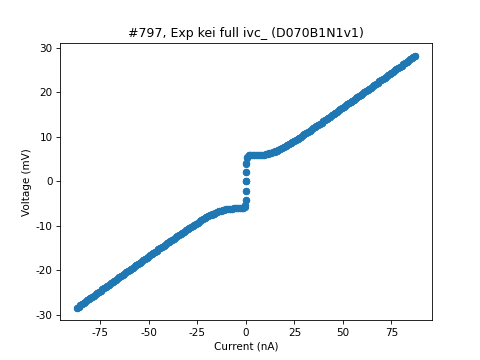

In [201]:
jj.pbi(797)

C:\Users\KelvinOX25\Anaconda3\lib\site-packages\qcodes\dataset\plotting.py:196: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, **subplots_kwargs)


<IPython.core.display.Javascript object>


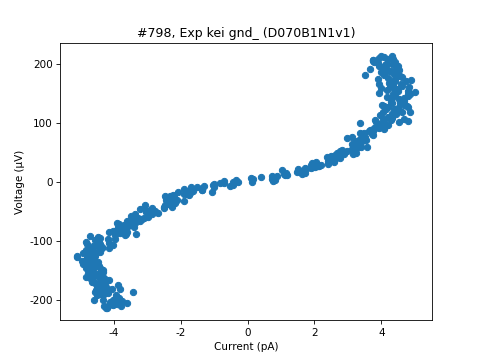

In [202]:
jj.pbi(798)

# Results

## to do